In [84]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

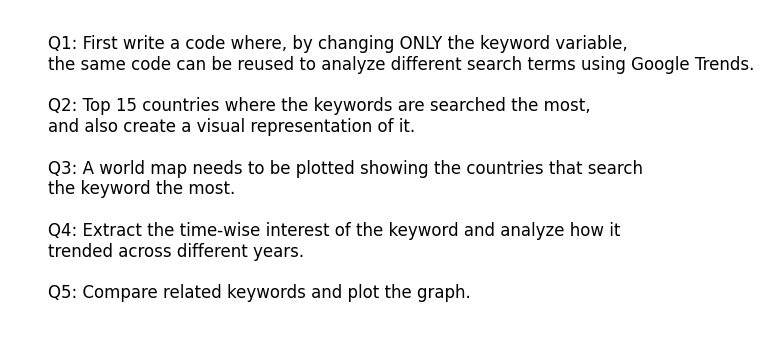

In [83]:
plt.figure(figsize=(18, 14))
plt.subplot(3, 2, 1)
text = (
    "Q1: First write a code where, by changing ONLY the keyword variable,\n"
    "the same code can be reused to analyze different search terms using Google Trends.\n\n"
    "Q2: Top 15 countries where the keywords are searched the most,\n"
    "and also create a visual representation of it.\n\n"
    "Q3: A world map needs to be plotted showing the countries that search\n"
    "the keyword the most.\n\n"
    "Q4: Extract the time-wise interest of the keyword and analyze how it\n"
    "trended across different years.\n\n"
    "Q5: Compare related keywords and plot the graph."
)
plt.text(0.06, 0.5, text, fontsize=12, va='center')
plt.axis('off')
plt.savefig("google_trends_analysis.jpg", dpi=300, bbox_inches="tight")
plt.show()

In [1]:
pip install pytrends

Note: you may need to restart the kernel to use updated packages.


In [11]:
from pytrends.request import TrendReq

In [12]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


1.First Write a code where, by changing just the keyword,we
can search for multiple things.

In [29]:
from pytrends.request import TrendReq

# Create Google Trends request object
pytrends = TrendReq(hl='en-US', tz=360)

# Keywords MUST be a list
keyword = ["cloud computing"]

In [33]:
pytrends.build_payload(kw_list=keyword,cat = 0,
                       timeframe='today 12-m',
                       geo='',gprop='')

2.Top 15 countries where the keywords are searched the most,
and also create visual representation of it.

Country wise interest

In [34]:
region_data = pytrends.interest_by_region()
region_data = region_data.sort_values(
    by = keyword,ascending = False).head(15)
                                       

C:\Users\gamek\AppData\Local\Temp\ipykernel_15500\4062830254.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = region_data[keyword[0]],y = region_data.index,


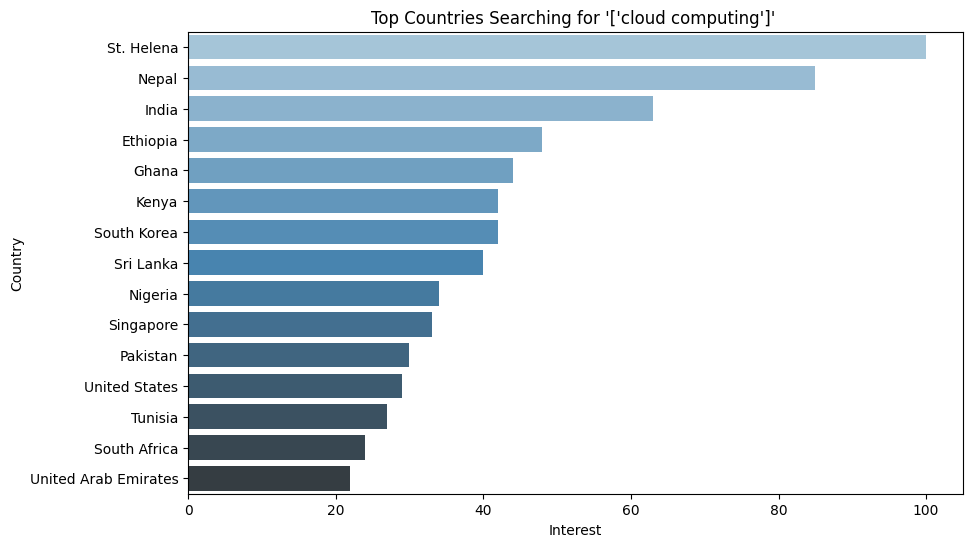

In [39]:
plt.figure(figsize = (10,6))
sns.barplot(x = region_data[keyword[0]],y = region_data.index,
            palette = "Blues_d",legend=False)
plt.title(f"Top Countries Searching for '{keyword}' ")
plt.xlabel("Interest")
plt.ylabel("Country")
plt.show()

3. A world map needs to be plotted showing the countries that search the keyword the most.

Word Map

C:\Users\gamek\AppData\Local\Temp\ipykernel_15500\3421812168.py:1: DeprecationWarning:

The library used by the *country names* `locationmode` option is changing in an upcoming version. Country names in existing plots may not work in the new version. To ensure consistent behavior, consider setting `locationmode` to *ISO-3*.



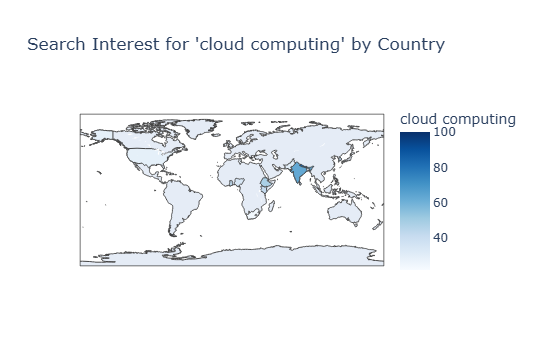

In [50]:
fig = px.choropleth(
    region_data,
    locations='geoName',
    locationmode='country names',
    color=keyword[0],   # 👈 FIX
    title=f"Search Interest for '{keyword[0]}' by Country",
    color_continuous_scale="Blues"
)
fig.show()


4. We need to extract the time-wise interst of the keyword
how it trended in different years.

Time Wise Interest

In [51]:
time_df = pytrends.interest_over_time()

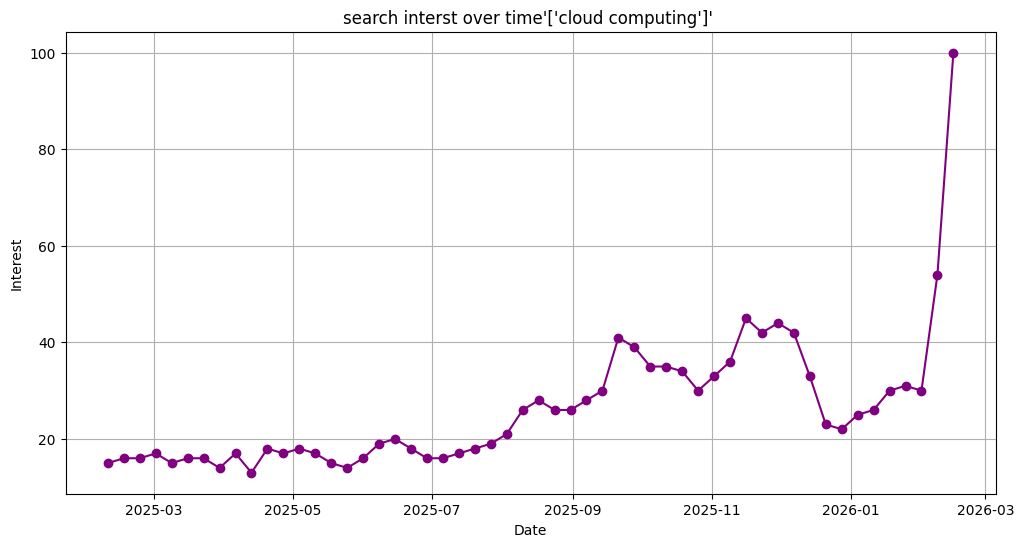

In [56]:
plt.figure(figsize=(12,6))
plt.plot(time_df.index,time_df[keyword],marker = 'o',
         color = "purple")
plt.title(f"search interst over time'{keyword}' ")
plt.xlabel("Date")
plt.ylabel("Interest")
plt.grid(True)
plt.show()

5.compare related keywords and plot the graph.

Multiple Keywords Comapare

In [58]:
kw_list = ["cloud computing","data Science","machine Learning"]
pytrends.build_payload(kw_list,cat=0,timeframe= 'today 12-m',geo='',gprop='')


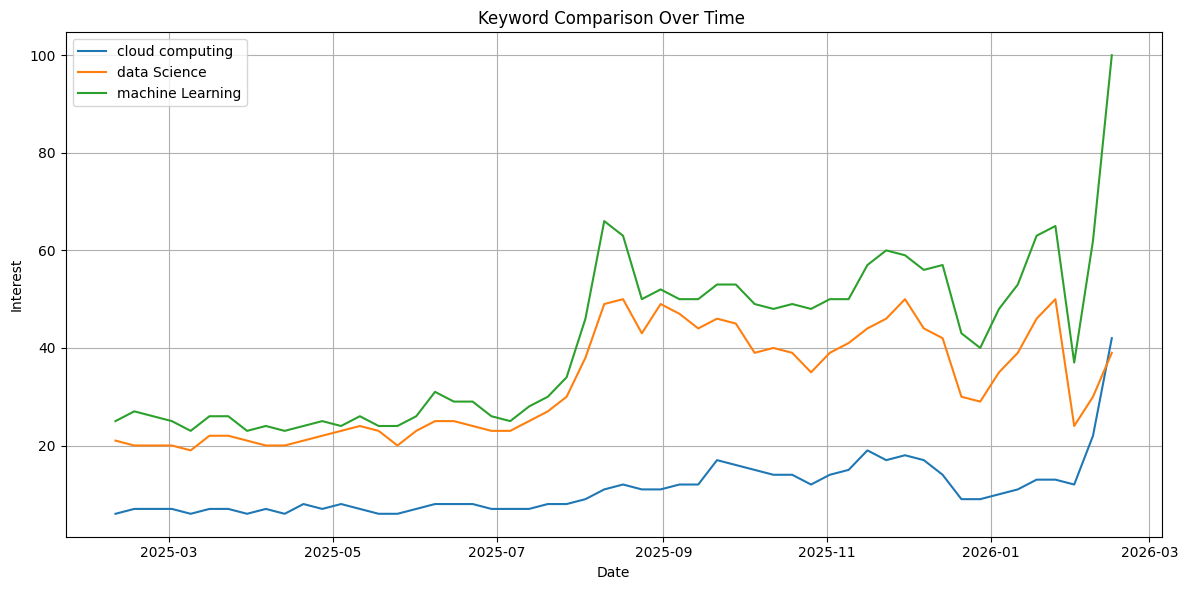

In [60]:
compare_df = pytrends.interest_over_time()
plt.figure(figsize=(12,6))
for kw in kw_list:
    plt.plot(compare_df.index,compare_df[kw],label=kw)
plt.title("Keyword Comparison Over Time ")
plt.xlabel("Date")
plt.ylabel("Interest")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()